In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [122]:
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('PUM.DE.1.csv', header=0, parse_dates=[0], index_col=0)

In [123]:
 #2. Đọc file csv và gắng index với giá Close
df1 = df.reset_index()['Close']

In [124]:
df1 = df1.dropna()

In [125]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [126]:
#train-test (7-3)

In [127]:
# 4. Chia train test 7-3
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [128]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [129]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [130]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [131]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 262ms/step - loss: 0.0983 - val_loss: 0.0078
Epoch 2/100
13/13 [==============================] - 1s 108ms/step - loss: 0.0175 - val_loss: 0.0263
Epoch 3/100
13/13 [==============================] - 1s 105ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 4/100
13/13 [==============================] - 1s 103ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 5/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 6/100
13/13 [==============================] - 1s 106ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 7/100
13/13 [==============================] - 1s 98ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 8/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 9/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 10/100
13/13 [==============================] - 1s 102ms/step - loss: 0.0036 - val_los

In [133]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 30ms/step


In [134]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [135]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 56.59684117284906
Testing MAPE: 348.72067186154203
Testing MAE: 56.42190812729404
Testing MSE: 3202.6433213108517


In [136]:
test_data.shape

(380, 1)

In [137]:
x_input=test_data[280:].reshape(1,-1)
x_input.shape

(1, 100)

In [138]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[280:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.13721816]
101
1 day input [0.31504964 0.31477404 0.30981263 0.30567808 0.3051268  0.30071666
 0.2775634  0.27949283 0.28031976 0.24807057 0.25165385 0.24834622
 0.25275636 0.26984568 0.2723264  0.27370454 0.27590961 0.27508268
 0.26405734 0.26378171 0.25055129 0.26323048 0.27370454 0.26819183
 0.25992284 0.26130099 0.26185227 0.25110257 0.23869901 0.23787215
 0.23263508 0.2392503  0.21719961 0.20893055 0.19570013 0.18550165
 0.22960309 0.23814773 0.23842338 0.24035286 0.14636162 0.1648291
 0.14884234 0.16427787 0.15986774 0.14746419 0.12210586 0.1210033
 0.11742008 0.12789415 0.11604193 0.11080487 0.11962515 0.17282251
 0.17613009 0.15380375 0.14884234 0.14884234 0.15380375 0.16207281
 0.18081587 0.18687986 0.18219408 0.19321942 0.19928334 0.20424477
 0.16841238 0.14636162 0.17557886 0.18577729 0.15022054 0.14829111
 0.16675859 0.16813673 0.19266814 0.2020397  0.19597578 0.19680264
 0.1979052  0.22519296 0.23484015 0.24062844 0.24531423 0.25055129
 0.23484015 0.18880928 0.19101435 0

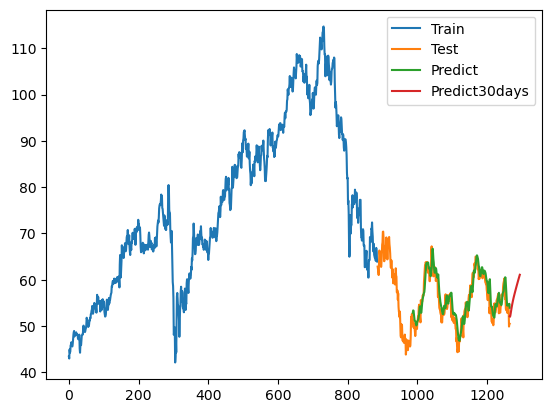

In [139]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [140]:
#train-test (8-2)

In [141]:
# 4. Chia train test 8-2
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [142]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [143]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [144]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [145]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [146]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 16s 229ms/step - loss: 0.0742 - val_loss: 0.0037
Epoch 2/100
15/15 [==============================] - 2s 114ms/step - loss: 0.0122 - val_loss: 0.0059
Epoch 3/100
15/15 [==============================] - 2s 119ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 4/100
15/15 [==============================] - 2s 109ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 5/100
15/15 [==============================] - 2s 114ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 6/100
15/15 [==============================] - 1s 100ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 7/100
15/15 [==============================] - 2s 103ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 8/100
15/15 [==============================] - 1s 97ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 9/100
15/15 [==============================] - 1s 93ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 10/100
15/15 [==============================] - 2s 105ms/step - loss: 0.0032 - val_los

In [147]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 31ms/step


In [148]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [149]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 56.16271699295437
Testing MAPE: 360.50637740491936
Testing MAE: 55.96190754789253
Testing MSE: 3153.640756125649


In [150]:
test_data.shape

(254, 1)

In [151]:
x_input=test_data[154:].reshape(1,-1)
x_input.shape

(1, 100)

In [152]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[154:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.12205543]
101
1 day input [0.31504964 0.31477404 0.30981263 0.30567808 0.3051268  0.30071666
 0.2775634  0.27949283 0.28031976 0.24807057 0.25165385 0.24834622
 0.25275636 0.26984568 0.2723264  0.27370454 0.27590961 0.27508268
 0.26405734 0.26378171 0.25055129 0.26323048 0.27370454 0.26819183
 0.25992284 0.26130099 0.26185227 0.25110257 0.23869901 0.23787215
 0.23263508 0.2392503  0.21719961 0.20893055 0.19570013 0.18550165
 0.22960309 0.23814773 0.23842338 0.24035286 0.14636162 0.1648291
 0.14884234 0.16427787 0.15986774 0.14746419 0.12210586 0.1210033
 0.11742008 0.12789415 0.11604193 0.11080487 0.11962515 0.17282251
 0.17613009 0.15380375 0.14884234 0.14884234 0.15380375 0.16207281
 0.18081587 0.18687986 0.18219408 0.19321942 0.19928334 0.20424477
 0.16841238 0.14636162 0.17557886 0.18577729 0.15022054 0.14829111
 0.16675859 0.16813673 0.19266814 0.2020397  0.19597578 0.19680264
 0.1979052  0.22519296 0.23484015 0.24062844 0.24531423 0.25055129
 0.23484015 0.18880928 0.19101435 0

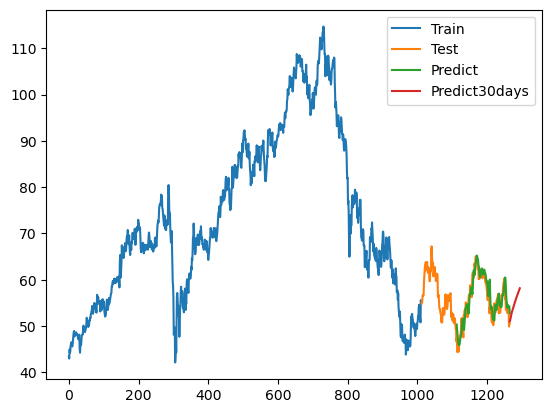

In [153]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [154]:
#train-test (9-1)

In [155]:
# 4. Chia train test 9-1
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [156]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [157]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [158]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [159]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [160]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 8s 182ms/step - loss: 0.0600 - val_loss: 0.0032
Epoch 2/100
17/17 [==============================] - 2s 89ms/step - loss: 0.0101 - val_loss: 0.0026
Epoch 3/100
17/17 [==============================] - 2s 91ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 4/100
17/17 [==============================] - 2s 123ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 6/100
17/17 [==============================] - 2s 117ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 7/100
17/17 [==============================] - 2s 114ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 8/100
17/17 [==============================] - 2s 109ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 9/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 10/100
17/17 [==============================] - 2s 108ms/step - loss: 0.0029 - val_loss

In [161]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 46ms/step


In [162]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [163]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 56.03957087148592
Testing MAPE: 316.2754423849447
Testing MAE: 55.99243757243974
Testing MSE: 3140.2922539190254


In [164]:
test_data.shape

(127, 1)

In [165]:
x_input=test_data[27:].reshape(1,-1)
x_input.shape

(1, 100)

In [166]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[27:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.12148675]
101
1 day input [0.31504964 0.31477404 0.30981263 0.30567808 0.3051268  0.30071666
 0.2775634  0.27949283 0.28031976 0.24807057 0.25165385 0.24834622
 0.25275636 0.26984568 0.2723264  0.27370454 0.27590961 0.27508268
 0.26405734 0.26378171 0.25055129 0.26323048 0.27370454 0.26819183
 0.25992284 0.26130099 0.26185227 0.25110257 0.23869901 0.23787215
 0.23263508 0.2392503  0.21719961 0.20893055 0.19570013 0.18550165
 0.22960309 0.23814773 0.23842338 0.24035286 0.14636162 0.1648291
 0.14884234 0.16427787 0.15986774 0.14746419 0.12210586 0.1210033
 0.11742008 0.12789415 0.11604193 0.11080487 0.11962515 0.17282251
 0.17613009 0.15380375 0.14884234 0.14884234 0.15380375 0.16207281
 0.18081587 0.18687986 0.18219408 0.19321942 0.19928334 0.20424477
 0.16841238 0.14636162 0.17557886 0.18577729 0.15022054 0.14829111
 0.16675859 0.16813673 0.19266814 0.2020397  0.19597578 0.19680264
 0.1979052  0.22519296 0.23484015 0.24062844 0.24531423 0.25055129
 0.23484015 0.18880928 0.19101435 0

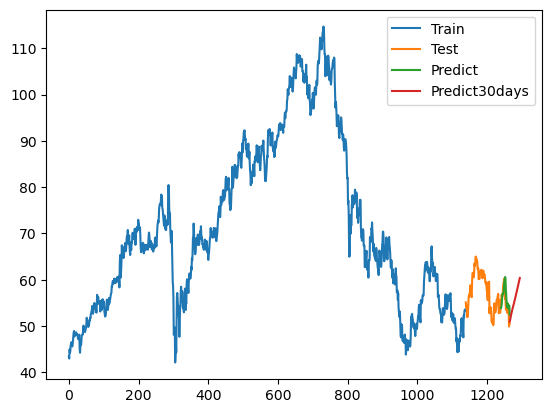

In [167]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()